In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from edudiff import Value, gmap

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Very Simple Example

In [2]:
a = Value(5)
b = Value(8)
c = Value(2)

((a + c) * b + c).backward()

a.gradient, b.gradient, c.gradient

(8, 7, 9)

# Linear Regression

In [3]:
n_features, n_samples = 3, 200

xs = np.random.uniform(0, 40, size=(n_features, n_samples))
W = np.random.random((n_features,))
err = 5 * np.random.normal(size=(n_samples))

y = W @ xs + err

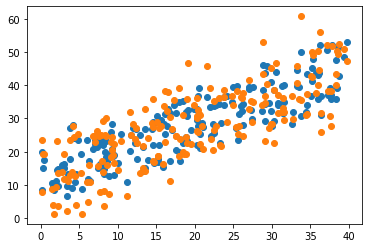

In [4]:
plt.scatter(xs[0], (W @ xs))
plt.scatter(xs[0], y)

### Define our Model

/home/moose/conrad/GitHub/edudiff/edudiff/ops.py:62: RuntimeWarning: invalid value encountered in log
  r.receive_gradient(g * self.value * np.log(l.value))


Text(0.5, 0, 'Epochs')

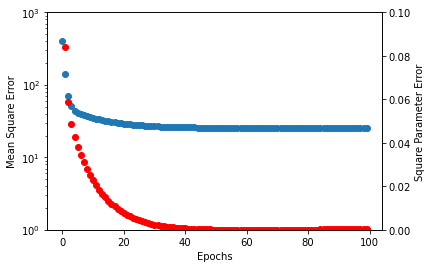

In [5]:
xi = Value(xs, requires_gradient=False)
Wi = Value(np.random.random((n_features,)))

learning_rate = 1e-6

error = []
w_error = []
for _ in range(100):
    y_hat = Wi @ xi
    mse_loss = ((y_hat - y) ** 2).sum()
    gmap(mse_loss, lambda v: v.parents, lambda v: v.clear_gradient())
    
    mse_loss.backward()
    error.append(mse_loss.value / n_samples)
    w_error.append(np.mean((W - Wi.value) ** 2))
    
    Wi.value -= learning_rate * Wi.gradient

fig, ax = plt.subplots()
ax.scatter(np.arange(100), error)
ax.set_yscale("log")
ax.set_ylim([1, 1000])
ax.set_ylabel("Mean Square Error")

ax2 = ax.twinx()
ax2.scatter(np.arange(100), w_error, color="red")
ax2.set_ylim([0, 0.1])
ax2.set_ylabel("Square Parameter Error")
ax.set_xlabel("Epochs")